In [36]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
#list of libraries
from datetime import date
import praw
import pandas as pd
import datetime as dt
import seaborn as sns
pd.set_option('display.max_rows', 500)
from bs4 import BeautifulSoup
import requests
import time

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
def cleanCashFlowStringFromMorningStar(cash_flow_string, multiplier, start_year, metric):
    temp = [] 
    cash_flows = []
    for i in cash_flow_string:
        temp.append(i.split('\t'))

    for i in temp[0]:
        cash_flows.append(int(i)*multiplier)
        
    df = pd.DataFrame(cash_flows, [i+start_year for i in range(0,len(cash_flows))], columns=[metric])
    
    return df

# Analysis: Peak Fintech Group

In [3]:
ticker_symbol = 'TNT'
today = date.today()

print("Ticker Symbol: " + ticker_symbol)
print("Last Update Date:", today)

Ticker Symbol: TNT
Last Update Date: 2021-09-17


## 1. Business Overview

Peak Fintech Group Inc., through its subsidiaries, operates in the commercial lending industry in China. It operates through two segments, Fintech Platform and Financial Services. The Fintech Platform segment provides procurement and distribution of products within supply chains or facilitating transactions in the commercial lending industry through technology platforms. The Financial Services segment offers commercial loans to entrepreneurs, and small and medium-sized businesses, as well as turn-key credit outsourcing services to banks and other lending institutions. The company was formerly known as Peak Positioning Technologies Inc. and changed its name to Peak Fintech Group Inc. in November 2020. Peak Fintech Group Inc. was incorporated in 2008 and is based in Montreal, Canada.

## 2. Model's Assumptions

#### Outstanding Shares at Horizon:
- 129 726 489 outstanding shares in 2021, 73 783 060 outstanding shares in 2020, if we assume the same rate of share dilution, we should see 1,314,784,592 in 2025


#### Revenue:
- TTM Revenue: 75M CAD, but we will assume revenue close to 80M CAD for the end of 2021
- Revenue for 2020: 42M CAD
- Revenue in 2022: 133M CAD

#### P/S Multiple:
-We will assume a similar P/S multiple as SQUARE and Paypal: 8-14 range even though they are more mature companies will lower growth rate




## 3. P/S Ratio Model

Steps:
1. Come up with some estimations of the revenue for the next 5-10 years 
2. Assume a P/S ratio 
3. Get a market capitalizatoin
4. Divide by the number of outstanding shares at horizon
5. discount the share price by a factor of 10% and you get the adjusted fair price today
6. Take into account a margin of safety

       Revenue
2019  11000000
2020  42000000
2021  80000000


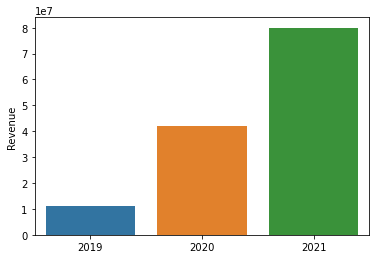

In [22]:
a = ['11	42	80'] #copy and paste from morning star

outstanding_shares_at_horizon = 1314784592

# cash flow strings, multiplier, starting year
a = cleanCashFlowStringFromMorningStar(a, 1000000, 2019, 'Revenue')
print(a)

import seaborn as sns
#sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=a.index, y="Revenue", data=a)

In [23]:
#computing the average growth rate
growth_rate = a.pct_change().values[len(a)-1].mean()+1
print("The growth rate that will be used " + str(round(float(growth_rate),2)))


The growth rate that will be used 1.9


In [24]:
future_timeline = 5
discount_rate = 0.10
pe_at_horizon = 14

import datetime
now = datetime.datetime.now()
current_year = now.year

In [35]:
earnings_at_horizon = a[-1:].values[0][0] #latest cashflow
list_of_discounted_earnings = 0
list_of_earnings  = 0
for i in range(0, future_timeline):
    earnings_at_horizon = earnings_at_horizon*growth_rate
    discounted_earnings_at_horizon = earnings_at_horizon/((1+discount_rate)**(i+1))
    #print(discounted_cash_flow_at_horizon)
    #print(" Cash flow in " + str(i+1+current_year) + " is : " + str("${:,.2f}".format(int(cash_flow_at_horizon))+"$"))
    print(" Discounted Revenue in " + str(i+1+current_year) + " is : " + str("${:,.2f}".format(int(discounted_earnings_at_horizon))+"$"))


    list_of_earnings = list_of_earnings + earnings_at_horizon
    list_of_discounted_earnings = list_of_discounted_earnings + discounted_earnings_at_horizon
    #print(cash_flow_at_horizon)
    
fair_price_now = discounted_earnings_at_horizon/outstanding_shares_at_horizon * pe_at_horizon
price_today = list_of_earnings/outstanding_shares_at_horizon*pe_at_horizon
print(" ")
print("The fair price for the stock today is " + str(int(fair_price_now)) + "$")
print(" ")
print("The price at horizon for the stock is " + str(int(price_today)) + "$")


 Discounted Revenue in 2022 is : $138,528,138.00$
 Discounted Revenue in 2023 is : $239,875,564.00$
 Discounted Revenue in 2024 is : $415,368,942.00$
 Discounted Revenue in 2025 is : $719,253,580.00$
 Discounted Revenue in 2026 is : $1,245,460,746.00$
 
The fair price for the stock today is 13$
 
The price at horizon for the stock is 43$


## 4. Position